# Testing and visualize regoinal-global cluster grid  


##  Fei Zhang
### 2018-09-24





Read in a CSV files containing the cell center coordinates of a Grid Model

Visualize the Grid centers to see if the Grid definition and spatial point mapping is correct

In [2]:
!which python

/g/data1a/ha3/fxz547/miniconda3/bin/python


In [3]:
!python -V

Python 3.6.6


In [4]:
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

# from IPython.display import display
# %matplotlib inline

In [5]:
import sys
# get the pst packages into PYTHONPATH 
sys.path.append("/Softlab/Githubz/passive-seismic")  

from seismic.traveltime.cluster_grid import Grid2 
from seismic.traveltime.sort_rays import sort,sort2

In [6]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
    
    # read infile, tweek below
    in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    #finalpdf =  pd.read_csv(csvfile,  sep='\s+', header=None,  names=col_names) # white space
  
    # columns you are interested?
#     col_names=['source_block', 'station_block', 'residual', 'event_number', 
#             'source_longitude','source_latitude','source_depth',  
#             'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [7]:
# my_grid= Grid2()
# mypdf = my_grid.generate_latlong_grid()

# OR read in already created CSV file:

mycsvfile='/g/data/ha3/fxz547/travel_time_tomography/Cluster_Grids/cluster_grid3D_v4.csv'

# mycsvfile = '/Softlab/travel_time_tomography/CSV_Data/cluster_grid_3d.csv'

mypdf= csv2pdf(mycsvfile)

In [8]:

pdf2=mypdf

pdf2.columns


Index(['blockn', 'xc', 'yc', 'zc', 'long', 'lat', 'depthmeter'], dtype='object')

In [9]:
pdf2.shape

(1234758, 7)

In [10]:
pdf2.blockn.nunique()  # number of unique values

796754

In [11]:
pdf2.zc.nunique()

53

In [12]:
depth_list = pdf2.zc.unique()

In [13]:
depth_list.sort()

In [14]:
print(depth_list)

[2.50000e+03 7.50000e+03 1.62500e+04 2.75000e+04 2.87500e+04 4.37500e+04
 6.12500e+04 8.00000e+04 8.25000e+04 1.00000e+05 1.22500e+05 1.47500e+05
 1.52500e+05 1.97500e+05 2.37500e+05 2.72500e+05 3.12500e+05 3.47500e+05
 3.77500e+05 4.22500e+05 4.72500e+05 5.47500e+05 5.97500e+05 6.72500e+05
 7.05000e+05 7.35000e+05 7.95000e+05 8.35000e+05 8.85000e+05 9.35000e+05
 9.75000e+05 1.03500e+06 1.07750e+06 1.14500e+06 1.19250e+06 1.28750e+06
 1.36250e+06 1.45000e+06 1.55000e+06 1.66250e+06 1.78750e+06 1.90000e+06
 2.00000e+06 2.10000e+06 2.20000e+06 2.30000e+06 2.40000e+06 2.48750e+06
 2.56250e+06 2.63750e+06 2.71250e+06 2.78475e+06 2.85425e+06]


In [15]:
pdf2.groupby(['blockn']).count().shape

(796754, 6)

In [16]:
pdf2.groupby(['blockn']).count().head()

,xc,yc,zc,long,lat,depthmeter
blockn,,,,,,
13161,1,1,1,1,1,1
13162,1,1,1,1,1,1
13163,1,1,1,1,1,1
13164,1,1,1,1,1,1
13165,1,1,1,1,1,1


In [17]:
final_pdf = pdf2.drop_duplicates(subset=['blockn'], keep='first', inplace=False)

In [18]:
final_pdf.head()

,blockn,xc,yc,zc,long,lat,depthmeter
0,7795442,1.25,-88.75,27500.0,0.0,-90.0,0.0
1,7795586,1.25,-86.25,27500.0,0.0,-88.7,0.0
2,7795730,1.25,-83.75,27500.0,0.0,-86.2,0.0
3,7795874,1.25,-81.25,27500.0,0.0,-83.7,0.0
4,7796018,1.25,-78.75,27500.0,0.0,-81.2,0.0


In [19]:
final_pdf.shape

(796754, 7)

In [20]:
global_grid = final_pdf[final_pdf.zc > depth_list[-1] -1]

In [21]:
global_grid.shape

(9633, 7)

In [22]:
regional_grid = final_pdf[final_pdf.zc < depth_list[0] +1 ]

In [23]:
regional_grid.head()

,blockn,xc,yc,zc,long,lat,depthmeter
2993,13161,100.25,-53.75,2500.0,100.0,-54.0,0.0
2994,13341,100.25,-53.25,2500.0,100.0,-53.7,0.0
2995,13521,100.25,-52.75,2500.0,100.0,-53.2,0.0
2996,13701,100.25,-52.25,2500.0,100.0,-52.7,0.0
2997,13881,100.25,-51.75,2500.0,100.0,-52.2,0.0


In [24]:
regional_grid.shape

(19621, 7)

In [25]:
# stop break

In [26]:
final_pdf.xc.max()

358.75

In [27]:
final_pdf.xc.min()

1.25

In [28]:
final_pdf.yc.max()

88.75

In [29]:
final_pdf.yc.min()

-88.75

In [30]:
# stop

# Begin to Visualize the data

# 1. Python Pandas package plot function (with basemap) 

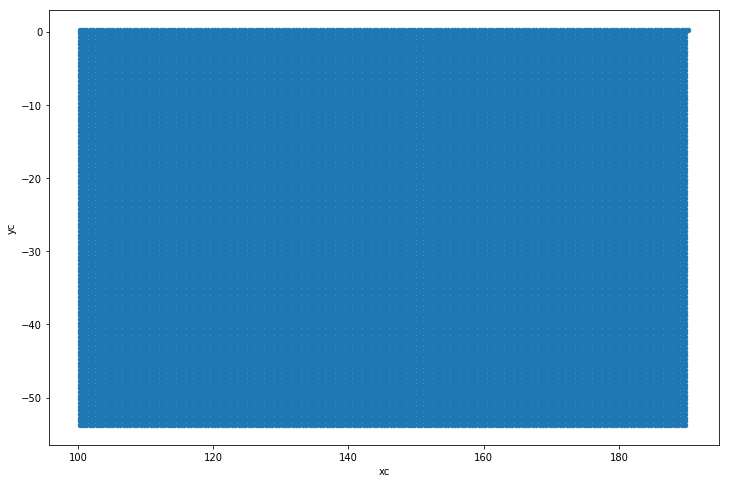

In [31]:
#plt.figure(); 
regional_grid.plot.scatter(x='xc', y='yc',  figsize=(12,8))

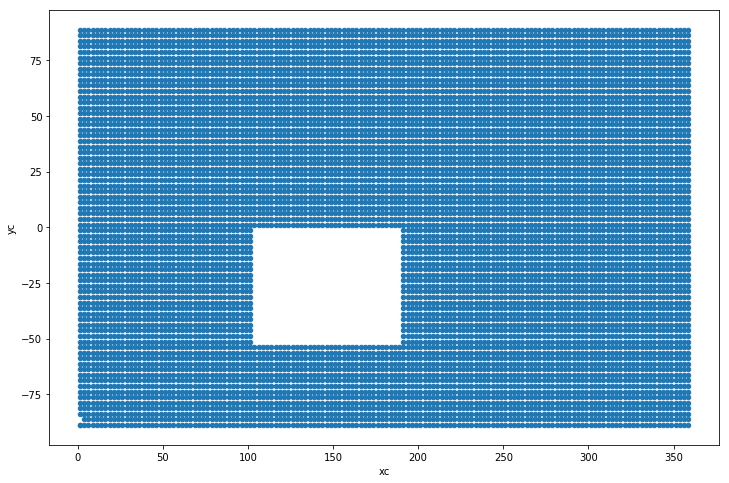

In [32]:
global_grid.plot.scatter(x='xc', y='yc', figsize=(12,8))

# 3. Geopandas and Maps

In [33]:
import geopandas as gpd

from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [34]:
event_locations = [Point(xy) for xy in zip(regional_grid.xc, regional_grid.yc)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
reg_geopdf = gpd.GeoDataFrame(regional_grid, crs=mycrs, geometry=event_locations)

In [35]:
# myax = geopdf.plot(figsize=[20,10])


# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude+
# title_str= "event locations"
# myax.set_title(title_str)

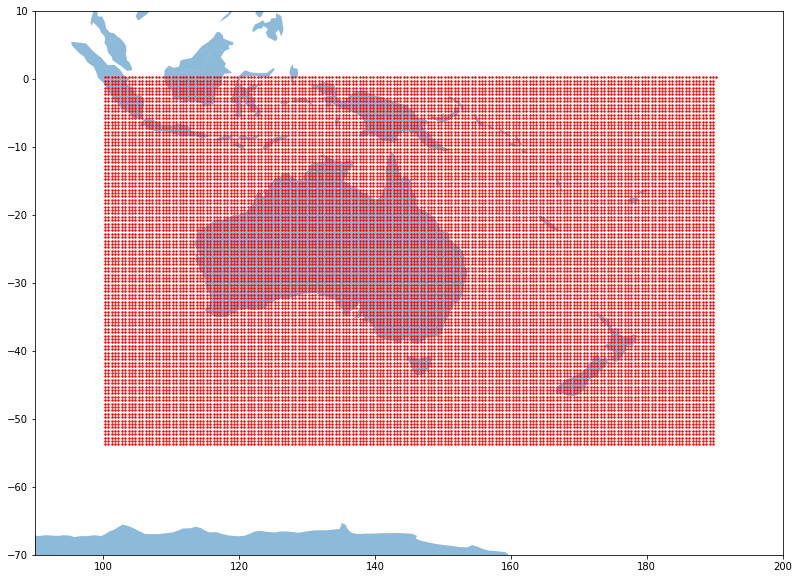

In [36]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([90,200])
myax.set_ylim([-70,10])
              
reg_geopdf.plot(ax=myax, marker='o', color='red', markersize=2);


In [37]:
# geopandas included shape datasets
grid_locations = [Point(xy) for xy in zip(global_grid.xc, global_grid.yc)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
glob_geopdf = gpd.GeoDataFrame(global_grid, crs=mycrs, geometry=grid_locations)


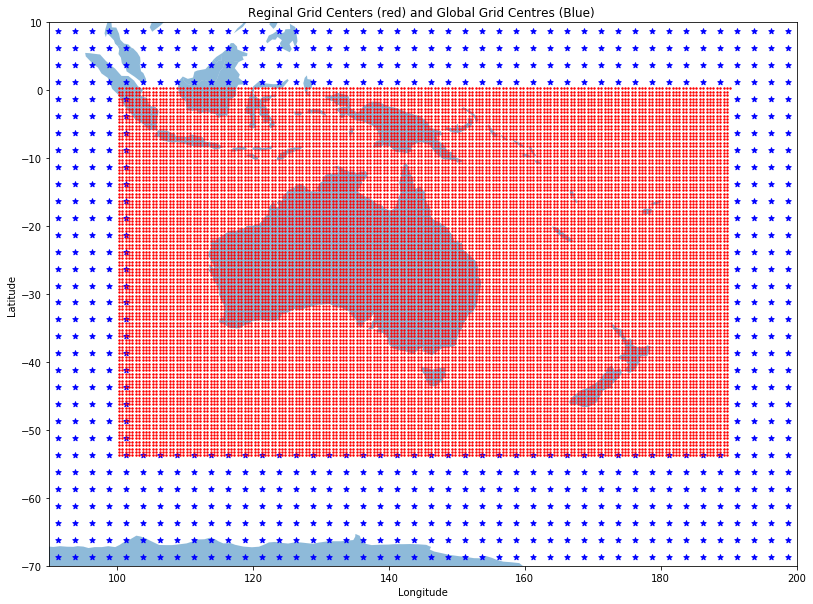

In [38]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([90,200])
myax.set_ylim([-70,10])

# myax.set_xlim([160,200])
# myax.set_ylim([-10,10])


myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
title_str= "Reginal Grid Centers (red) and Global Grid Centres (Blue) "
myax.set_title(title_str)

glob_geopdf.plot(ax=myax, marker='*', color='blue', markersize=32);

reg_geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

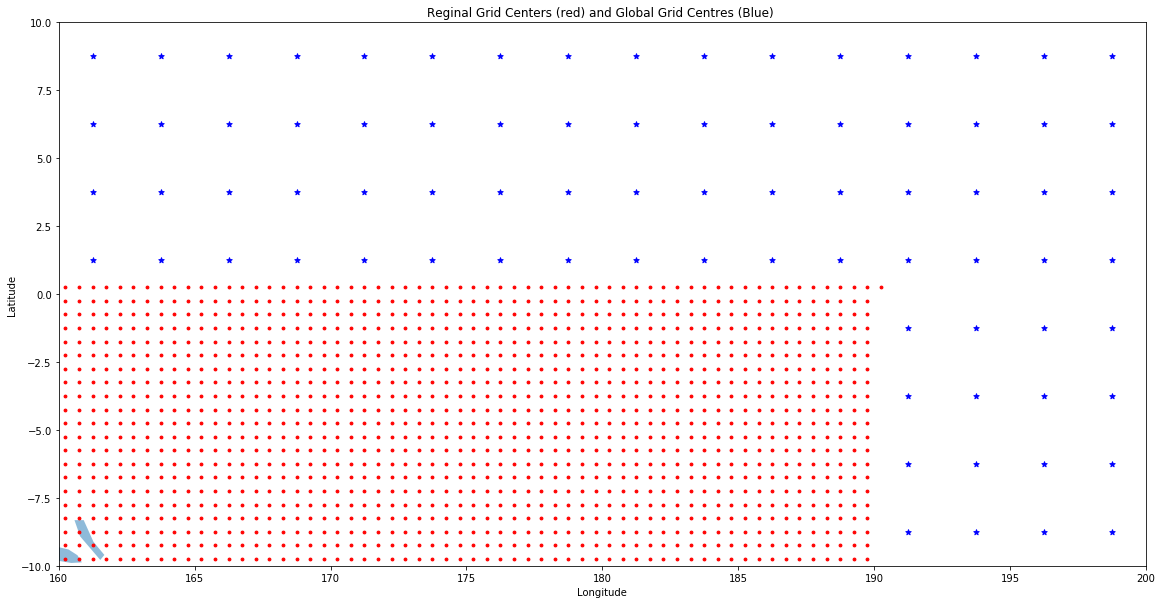

In [39]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

# myax.set_xlim([90,200])
# myax.set_ylim([-70,10])


myax.set_xlim([160,200])
myax.set_ylim([-10,10])


myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
title_str= "Reginal Grid Centers (red) and Global Grid Centres (Blue) "
myax.set_title(title_str)

glob_geopdf.plot(ax=myax, marker='*', color='blue', markersize=32);

reg_geopdf.plot(ax=myax, marker='o', color='red', markersize=8);

In [40]:
break

SyntaxError: 'break' outside loop (<ipython-input-40-6aaf1f276005>, line 1)

# The next cell will show many horizontal slices of the discrete model

In [ ]:
for adepth in depth_list:
    hview_grid = final_pdf[final_pdf.zc == adepth]
    
    title_str="horizontal view grid at depth = %s, %s, %s, %s"%(adepth, hview_grid.shape, hview_grid.blockn.min(), hview_grid.blockn.max())
    print (title_str)
    hview_grid.plot.scatter(x='xc', y='yc',  figsize=(12,8))

# Grid properties

In [41]:
mygrid=Grid2()

Use the default harded-coded Grid parameters in  /g/data1a/ha3/fxz547/Githubz/passive-seismic/seismic/traveltime/cluster_grid.py


In [42]:
mygrid.show_properties()

****** Show all attributes of the Grid instance:  ******* 
['LAT : (-54.0, 0.0) ', 'LON : (100.0, 190.0) ', 'REGION_MAX_BN : 7795441 ', 'dx : 0.5 ', 'dy : 0.5 ', 'gdepth : (0, 110, 280, 410, 660, 840, 1020, 1250, 1400, 1600, 1850, 2050, 2250, 2450, 2600, 2750, 2889) ', 'gdx : 2.5 ', 'gdy : 2.5 ', 'gmeters : [      0  110000  280000  410000  660000  840000 1020000 1250000 1400000\n 1600000 1850000 2050000 2250000 2450000 2600000 2750000 2889000] ', 'gnx : 144 ', 'gny : 72.0 ', 'gnz : 16 ', 'ndis : 2 ', 'nx : 180 ', 'ny : 108 ', 'nz : 23 ', 'rdepth : (0, 10, 35, 70, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610, 660, 710, 810, 910, 1010, 1110, 1250, 1400, 1600) ', 'refgmeters : [      0   55000  110000  195000  280000  345000  410000  535000  660000\n  750000  840000  930000 1020000 1135000 1250000 1325000 1400000 1500000\n 1600000 1725000 1850000 1950000 2050000 2150000 2250000 2350000 2450000\n 2525000 2600000 2675000 2750000 2819500 2889000] ', 'refrmeters : [      0    5000  

In [43]:
# border corner point mapping to the grid, 
# floating point errors, discontinuity
# bugs in code 

# inside and at border of the ANZ region
mygrid.find_block_number(-0.5,189.8, 2000.0)

(32601, 190.25, -0.25, 2500.0)

In [44]:
# outside the ANZ region

mygrid.find_block_number(10, 100, 2000.0)

(7801242, 101.25, 11.25, 27500.0)

#  More

In [45]:
796754/53

15033.094339622641

In [46]:
587980/20



29399.0

In [47]:
587980/29399

20.0

In [48]:
import numpy as np
np.linspace(0, 360, num=360*5+1)

array([0.000e+00, 2.000e-01, 4.000e-01, ..., 3.596e+02, 3.598e+02,
       3.600e+02])

In [49]:
np.linspace(-90,90, num=180*5+1)

array([-90. , -89.8, -89.6, -89.4, -89.2, -89. , -88.8, -88.6, -88.4,
       -88.2, -88. , -87.8, -87.6, -87.4, -87.2, -87. , -86.8, -86.6,
       -86.4, -86.2, -86. , -85.8, -85.6, -85.4, -85.2, -85. , -84.8,
       -84.6, -84.4, -84.2, -84. , -83.8, -83.6, -83.4, -83.2, -83. ,
       -82.8, -82.6, -82.4, -82.2, -82. , -81.8, -81.6, -81.4, -81.2,
       -81. , -80.8, -80.6, -80.4, -80.2, -80. , -79.8, -79.6, -79.4,
       -79.2, -79. , -78.8, -78.6, -78.4, -78.2, -78. , -77.8, -77.6,
       -77.4, -77.2, -77. , -76.8, -76.6, -76.4, -76.2, -76. , -75.8,
       -75.6, -75.4, -75.2, -75. , -74.8, -74.6, -74.4, -74.2, -74. ,
       -73.8, -73.6, -73.4, -73.2, -73. , -72.8, -72.6, -72.4, -72.2,
       -72. , -71.8, -71.6, -71.4, -71.2, -71. , -70.8, -70.6, -70.4,
       -70.2, -70. , -69.8, -69.6, -69.4, -69.2, -69. , -68.8, -68.6,
       -68.4, -68.2, -68. , -67.8, -67.6, -67.4, -67.2, -67. , -66.8,
       -66.6, -66.4, -66.2, -66. , -65.8, -65.6, -65.4, -65.2, -65. ,
       -64.8, -64.6,

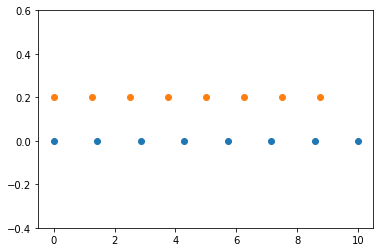

In [50]:
import matplotlib.pyplot as plt
N = 8
y=np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.2, 'o')

plt.ylim([-0.4, 0.6])
# (-0.5, 1)
plt.show()

In [51]:
print (x1, x2)

[ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.        ] [0.   1.25 2.5  3.75 5.   6.25 7.5  8.75]


In [52]:
x1 = np.linspace(0, 10, num=N+1)  # good grid
x2 = np.linspace(0, 10, N+1, endpoint=False)  # no good

In [53]:
print (x1, x2)

[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ] [0.         1.11111111 2.22222222 3.33333333 4.44444444 5.55555556
 6.66666667 7.77777778 8.88888889]
